In [15]:
#import library for analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset from folder data
df = pd.read_csv(r'D:\Portofolio\data\Sample_Superstore.csv', encoding="latin1")

In [3]:
#show top data from variable df
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#show information about dataset from variable df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
#show duplicated data in variable df
df.duplicated().sum()

0

In [6]:
#Checking missing values in dataset
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#Change type data in column Order Date and Ship Date from object to datetime
datetime = ['Order Date','Ship Date']

for col in datetime:
    df[col] = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18472\2752069230.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18472\2752069230.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)


In [8]:
#Checking type data from variable df
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [30]:
df.to_csv("D:\Portofolio\data\superstore_cleaned.csv", index=False, date_format="%Y-%m-%d")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Acer\AppData\Local\Temp\ipykernel_18472\1761065552.py:1: SyntaxWarning: invalid escape sequence '\P'
  df.to_csv("D:\Portofolio\data\superstore_cleaned.csv", index=False, date_format="%Y-%m-%d")


In [9]:
#Using EDA to knowing sales per month
month_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum() 

In [10]:
#Using EDA to knowing best selling product from category
product_sales = df.groupby(df['Category'])['Sales'].sum().sort_values(ascending=False)

In [11]:
#Using EDA to best perform sales from region
region_sales = df.groupby(df['Region'])['Sales'].sum()

In [12]:
#Using EDA to know correlation between Sales and Profit
df[['Sales','Profit']].corr()

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


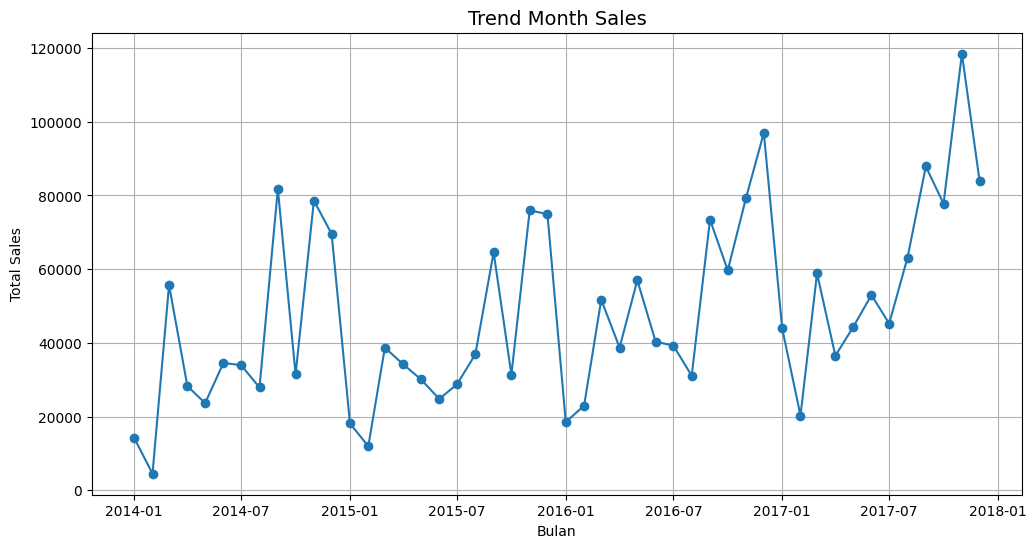

In [14]:
#Visualize month_sales using time series visualize
month_sales.index = month_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(month_sales.index, month_sales.values, marker = 'o')
plt.title("Trend Month Sales", fontsize = 14)
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18472\1157439271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette = "Greens_d")


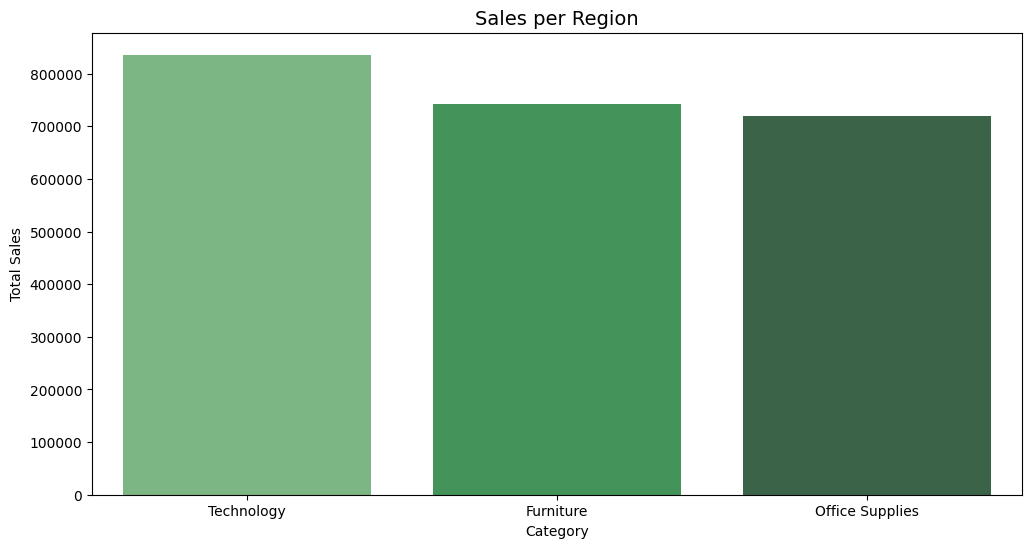

In [19]:
#Visualize category_sales using Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette = "Greens_d")
plt.title("Sales per Region", fontsize = 14)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18472\213151913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette = "Greens_d")


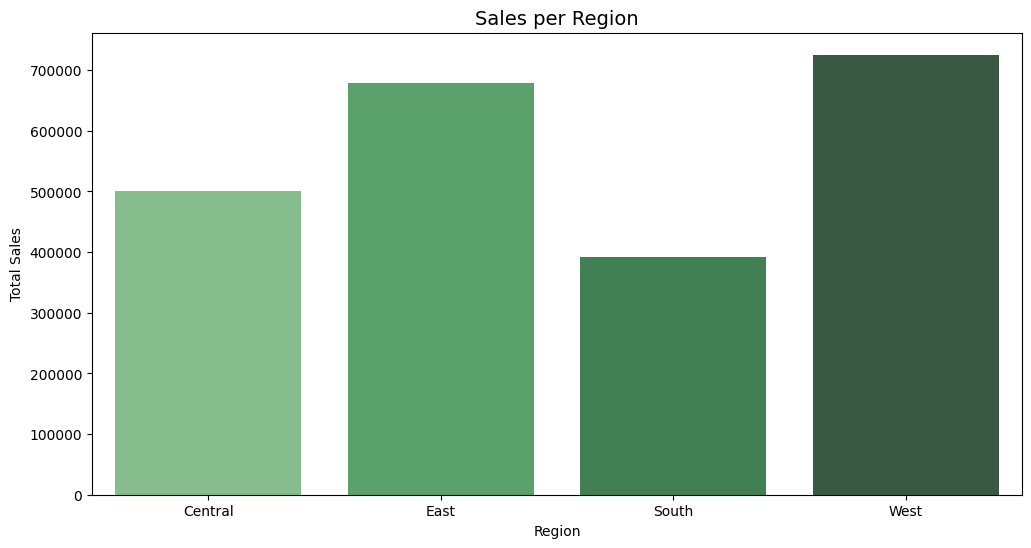

In [20]:
#Visualize region_sales using Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette = "Greens_d")
plt.title("Sales per Region", fontsize = 14)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

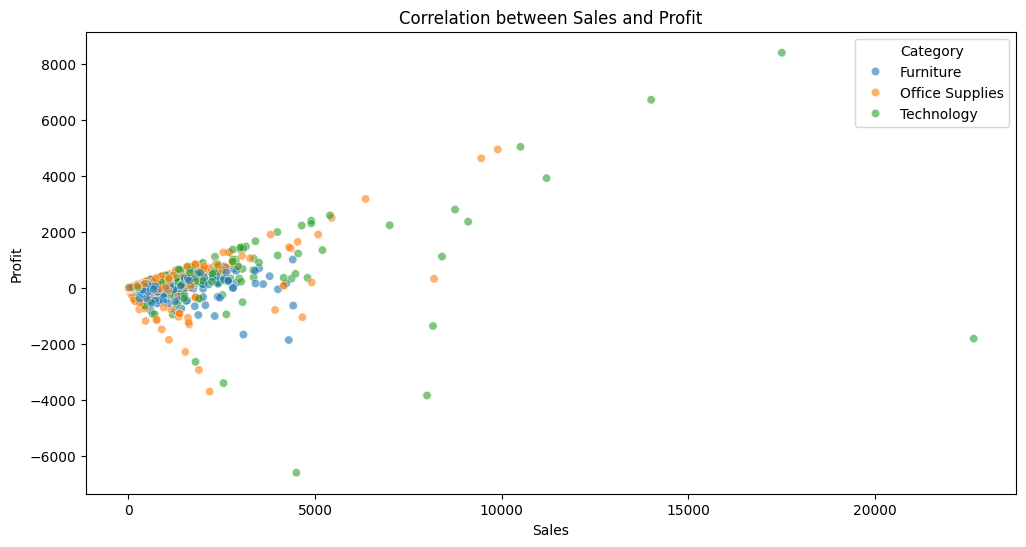

In [21]:
#Analize Correlation between Sales and Profit using Scatter Plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha = 0.6)
plt.title("Correlation between Sales and Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

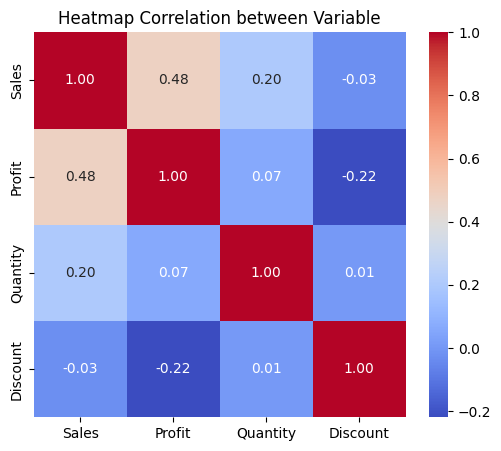

In [23]:
#Correlation between variable in dataset using heatmap correlation
plt.figure(figsize=(6,5))
sns.heatmap(df[['Sales','Profit','Quantity','Discount']].corr(), annot= True, cmap= "coolwarm", fmt=".2f")
plt.title("Heatmap Correlation between Variable")
plt.show()

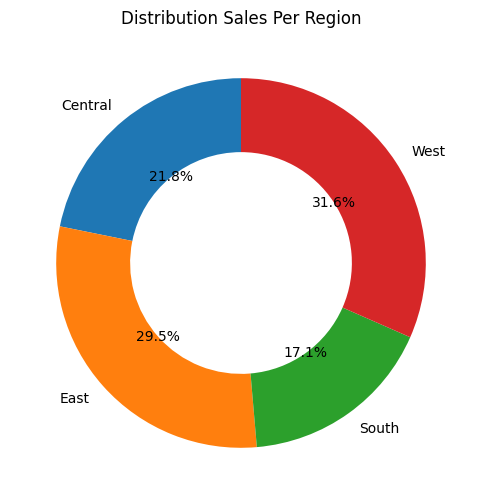

In [29]:
#Visualize distribution Sales per Region using Pie Chart

plt.figure(figsize=(12,6))
plt.pie(region_sales, labels= region_sales.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.4))
plt.title("Distribution Sales Per Region")
plt.show()